# Contingency Space: Visualization of 12 Metrics

This notebooks shows how the contingency space can be used to form metrics' surfaces. Two sets of plots are generated, for balanced and imbalanced cases.

In [1]:
%matplotlib inline

# global libs
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
import pandas as pd
import numpy as np
import seaborn as sns

# local libs
from utils.confusion_matrix import CM
from utils.cm_generator import CMGenerator
from metrics.acc import ACC
from metrics.bac import BAC
from metrics.gem import GEM
from metrics.roc import ROC
from metrics.tss import TSS
from metrics.hss import HSS
from metrics.pre import PRE
from metrics.rec import REC
from metrics.fbs import FBS
from metrics.gsr import GSR
from metrics.dli import DLI
from metrics.youden import YDN
from metrics.tau import Tau

#### Generate a Subset of All Confusion Matrices (Balanced)

In [2]:
gen = CMGenerator(n_p=3000, n_n=3000, n_cm=11)
gen.generate_cms()

#### Calculate All Metrics on All Balanced CM's.

In [3]:
all_tss = []
all_hss = []
all_acc = []
all_bac = []
all_gem = []
all_pre = []
all_rec = []
all_f1s = []
all_f2s = []
all_f3s = []
all_ydn = []
all_roc = []
all_tau = []
all_gsr = []
all_dli = []
for cm in gen.all_cms:
    tss = TSS(cm)
    all_tss.append(tss.value)
    hss = HSS(cm)
    all_hss.append(hss.value)
    acc = ACC(cm)
    all_acc.append(acc.value)
    pre = PRE(cm)
    all_pre.append(pre.value)
    rec = REC(cm)
    all_rec.append(rec.value)
    f1s = FBS(cm)
    all_f1s.append(f1s.value)
    f2s = FBS(cm, b=2)
    all_f2s.append(f2s.value)
    f3s = FBS(cm, b=3)
    all_f3s.append(f3s.value)
    bac = BAC(cm)
    all_bac.append(bac.value)
    gem = GEM(cm)
    all_gem.append(gem.value)
    ydn = YDN(cm)
    all_ydn.append(ydn.value)
    roc = ROC(cm)
    all_roc.append(roc.value)
    tau = Tau(cm)
    all_tau.append(tau.value)
    gsr = GSR(cm)
    all_gsr.append(gsr.value)
    dli = DLI(cm)
    all_dli.append(dli.value)

#### Create one matix per metric for all of its values.

In [4]:
acc_mat = np.flip(np.array(all_acc).reshape((11, 11)), 0)
bac_mat = np.flip(np.array(all_bac).reshape((11, 11)), 0)
gem_mat = np.flip(np.array(all_gem).reshape((11, 11)), 0)
pre_mat = np.flip(np.array(all_pre).reshape((11, 11)), 0)
rec_mat = np.flip(np.array(all_rec).reshape((11, 11)), 0)
f1s_mat = np.flip(np.array(all_f1s).reshape((11, 11)), 0)
f2s_mat = np.flip(np.array(all_f2s).reshape((11, 11)), 0)
f3s_mat = np.flip(np.array(all_f3s).reshape((11, 11)), 0)
tss_mat = np.flip(np.array(all_tss).reshape((11, 11)), 0)
hss_mat = np.flip(np.array(all_hss).reshape((11, 11)), 0)
ydn_mat = np.flip(np.array(all_ydn).reshape((11, 11)), 0)
roc_mat = np.flip(np.array(all_roc).reshape((11, 11)), 0)
tau_mat = np.flip(np.array(all_tau).reshape((11, 11)), 0)
gsr_mat = np.flip(np.array(all_gsr).reshape((11, 11)), 0)
dli_mat = np.flip(np.array(all_dli).reshape((11, 11)), 0)

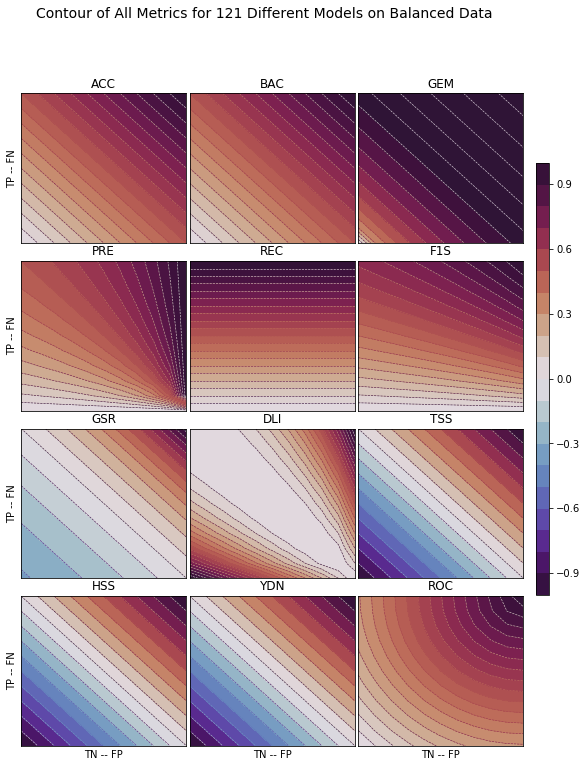

In [5]:
all_mats = [acc_mat, bac_mat, gem_mat, pre_mat, rec_mat, f1s_mat, gsr_mat, dli_mat, tss_mat, hss_mat, ydn_mat, roc_mat] 
all_titles = ['ACC', 'BAC', 'GEM', 'PRE', 'REC', 'F1S', 'GSR', 'DLI', 'TSS', 'HSS', 'YDN', 'ROC']
x = np.linspace(0, 10, 11)
y = np.linspace(0, 10, 11)
X, Y = np.meshgrid(x, y)
    
i = 0
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9,12))
fig.suptitle('Contour of All Metrics for 121 Different Models on Balanced Data', fontsize=14)
for ax in axs.flat:
    cp = ax.contourf(X, Y, np.flipud(all_mats[i]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_mats[i]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[i])
    if all_titles[i] == 'TSS':
        good_range_cp = cp
    i += 1

for ax in axs.flat:
    ax.set(xlabel='TN -- FP', ylabel='TP -- FN')
    
cb_ax = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cbar = fig.colorbar(good_range_cp, cax=cb_ax)

for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.02, hspace=0.12)

#### Generate a Subset of All Confusion Matrices (Imbalanc Ratio 1:50).

In [6]:
gen = CMGenerator(n_p=1000, n_n=5000, n_cm=11)
gen.generate_cms()

#### Let's first calculate the **Model Point** for each mode.

In [7]:
model_points = []
tau = None
all_cms = gen.all_cms[::-1]
for cm in all_cms:
    tau = Tau(cm)
    model_points.append(tau.model_point)
df_model_points = pd.DataFrame(model_points, columns=['X', 'Y'])

#### Calculate All Metrics on All Imbalanced CM's.

In [8]:
all_tss = []
all_hss = []
all_acc = []
all_bac = []
all_gem = []
all_pre = []
all_rec = []
all_f1s = []
all_f2s = []
all_f3s = []
all_ydn = []
all_roc = []
all_tau = []
all_gsr = []
all_dli = []

for cm in gen.all_cms:
    tss = TSS(cm)
    all_tss.append(tss.value)
    hss = HSS(cm)
    all_hss.append(hss.value)
    acc = ACC(cm)
    all_acc.append(acc.value)
    pre = PRE(cm)
    all_pre.append(pre.value)
    rec = REC(cm)
    all_rec.append(rec.value)
    f1s = FBS(cm)
    all_f1s.append(f1s.value)
    f2s = FBS(cm, b=2)
    all_f2s.append(f2s.value)
    f3s = FBS(cm, b=3)
    all_f3s.append(f3s.value)
    bac = BAC(cm)
    all_bac.append(bac.value)
    gem = GEM(cm)
    all_gem.append(gem.value)
    ydn = YDN(cm)
    all_ydn.append(ydn.value)
    roc = ROC(cm)
    all_roc.append(roc.value)
    tau = Tau(cm)
    all_tau.append(tau.value)
    gsr = GSR(cm)
    all_gsr.append(gsr.value)
    dli = DLI(cm)
    all_dli.append(dli.value)

#### Perpare data for visualizations.

In [9]:
acc_mat = np.flip(np.array(all_acc).reshape((11, 11)), 0)
bac_mat = np.flip(np.array(all_bac).reshape((11, 11)), 0)
gem_mat = np.flip(np.array(all_gem).reshape((11, 11)), 0)
pre_mat = np.flip(np.array(all_pre).reshape((11, 11)), 0)
rec_mat = np.flip(np.array(all_rec).reshape((11, 11)), 0)
f1s_mat = np.flip(np.array(all_f1s).reshape((11, 11)), 0)
f2s_mat = np.flip(np.array(all_f2s).reshape((11, 11)), 0)
f3s_mat = np.flip(np.array(all_f3s).reshape((11, 11)), 0)
tss_mat = np.flip(np.array(all_tss).reshape((11, 11)), 0)
hss_mat = np.flip(np.array(all_hss).reshape((11, 11)), 0)
ydn_mat = np.flip(np.array(all_ydn).reshape((11, 11)), 0)
roc_mat = np.flip(np.array(all_roc).reshape((11, 11)), 0)
tau_mat = np.flip(np.array(all_tau).reshape((11, 11)), 0)
gsr_mat = np.flip(np.array(all_gsr).reshape((11, 11)), 0)
dli_mat = np.flip(np.array(all_dli).reshape((11, 11)), 0)

## Plot All Metrics

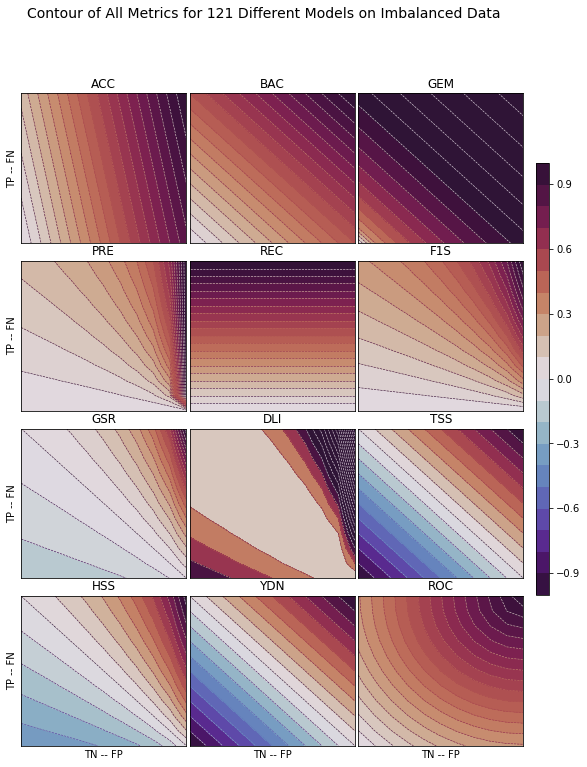

In [10]:
all_mats = [acc_mat, bac_mat, gem_mat, pre_mat, rec_mat, f1s_mat, gsr_mat, dli_mat, tss_mat, hss_mat, ydn_mat, roc_mat] 
all_titles = ['ACC', 'BAC', 'GEM', 'PRE', 'REC', 'F1S', 'GSR', 'DLI', 'TSS', 'HSS', 'YDN', 'ROC']
x = np.linspace(0, 10, 11)
y = np.linspace(0, 10, 11)
X, Y = np.meshgrid(x, y)
    
i = 0
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9,12))
fig.suptitle('Contour of All Metrics for 121 Different Models on Imbalanced Data', fontsize=14)
for ax in axs.flat:
    cp = ax.contourf(X, Y, np.flipud(all_mats[i]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_mats[i]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[i])
    if all_titles[i] == 'TSS':
        good_range_cp = cp
    i += 1

for ax in axs.flat:
    ax.set(xlabel='TN -- FP', ylabel='TP -- FN')
    
cb_ax = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cbar = fig.colorbar(good_range_cp, cax=cb_ax)

for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.02, hspace=0.12)